# Magic the Gathering analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
%matplotlib inline

## Number of cards illustrated per artist
Here two plots displaying the number of cards illustrated by each artist.

We can see that the most productive artist is Kev Walker, with __454__ cards illustrated since __1996__, for an average of approximately __16__ cards a year for the past __27__ year. He is also well ahead of the Svetlin Velinov with practically half as more cards illustrated.

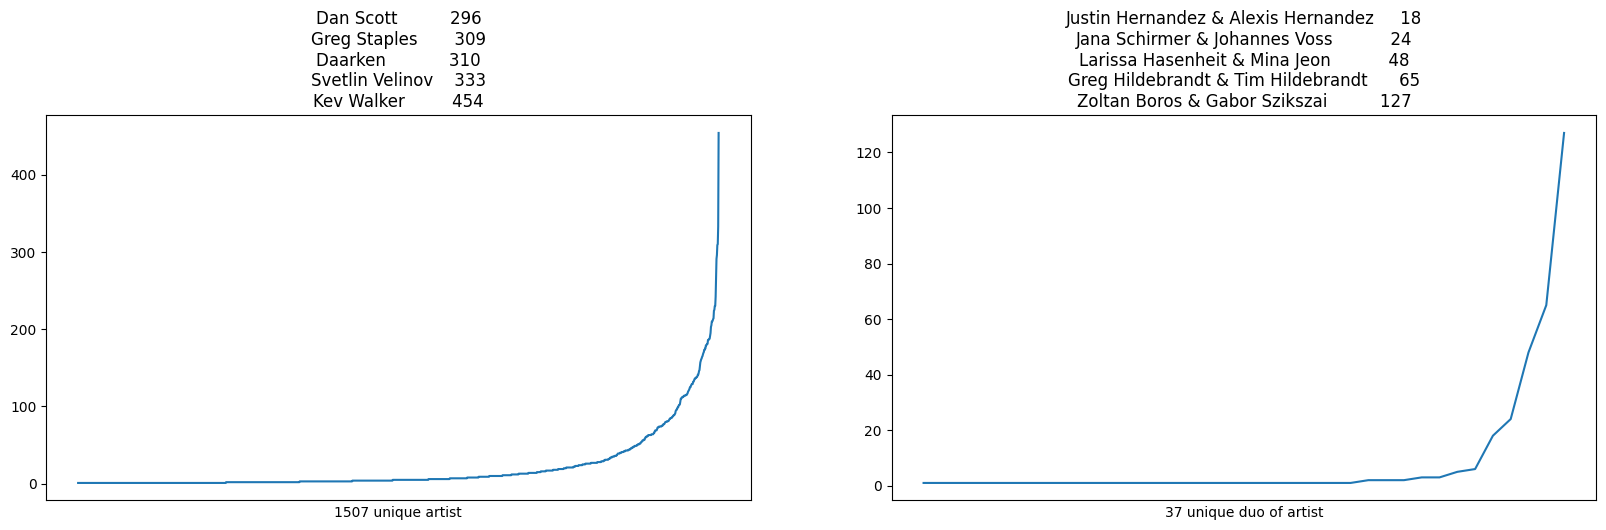

In [14]:
df = pd.read_csv("./cards.csv", usecols=["artist", "name"]).dropna()

# separate solo and duo, by applying a mask
df["mask"] = df["artist"].str.contains("&")  # & present if duo
df = df[["artist", "name", "mask"]].dropna().drop_duplicates()

df_solo = df[~df["mask"]].value_counts("artist", ascending=True)
df_duo = df[df["mask"]].value_counts("artist", ascending=True)

fig, axes = plt.subplots(ncols=2)

solo_plot = df_solo.plot(kind="line", ax=axes[0])
solo_plot.tick_params("x", which="both", bottom=False, labelbottom=False)
solo_plot.set_xlabel(f"{df_solo.shape[0]} unique artist")
solo_plot.set_title(df_solo.tail().to_string(header=False))

duo_plot = df_duo.plot(kind="line", ax=axes[1])
duo_plot.tick_params("x", which="both", bottom=False, labelbottom=False)
duo_plot.set_xlabel(f"{df_duo.shape[0]} unique duo of artist")
duo_plot.set_title(df_duo.tail().to_string(header=False))

plt.rcParams['figure.figsize'] = [15, 5]
plt.show()

## The 10 most reprinted cards
Here a plot of the most reprinted cards in Magic the Gathering history. 

I preferred to exclude the lands, because they would obviously be at the top. 

The slightest alteration in design is enough to make it a disctint reprint.

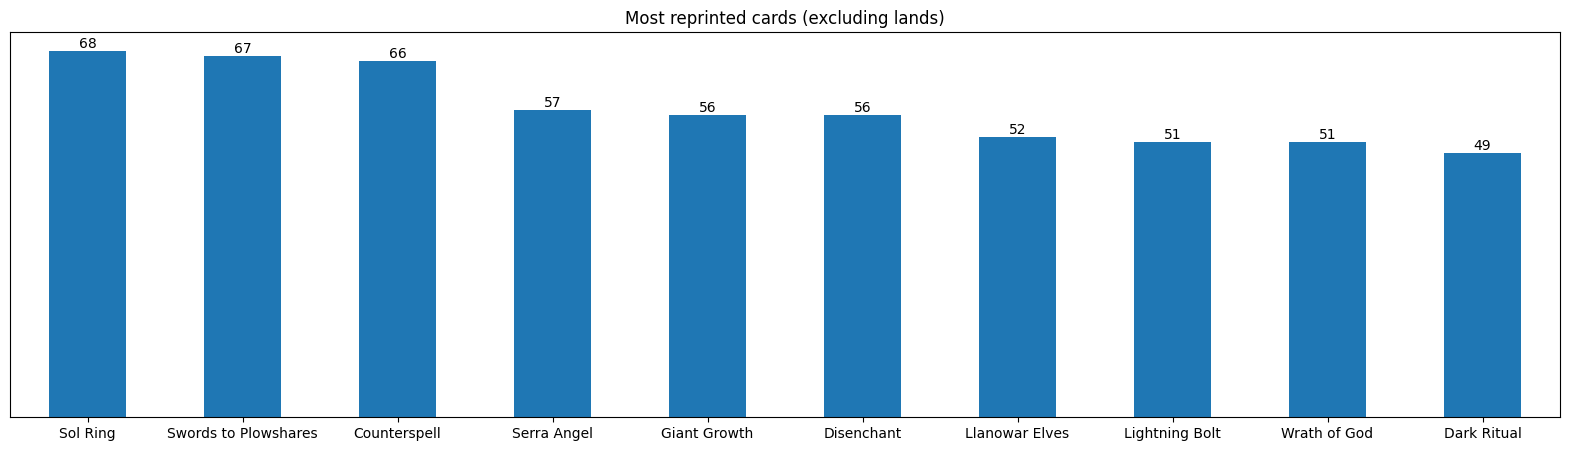

In [13]:
# using the "printings" column we get slightly smaller results probably because "printings",
# only track in which set the cards are present without tracking how many time

df = pd.read_csv("./cards.csv", usecols=["name", "types"])
df = df.loc[(df["types"] != "Land")]  # exclude the lands
df = df["name"].value_counts()[:10]  # select the top ten

plot = df.plot(kind="bar", rot=0)
plot.bar_label(plot.containers[0])
plot.tick_params("y", which="both", left=False, labelleft=False)
plot.set_title("Most reprinted cards (excluding lands)")
plot.set_xlabel("")

plt.rcParams['figure.figsize'] = [20, 5]
plt.show()

## Proportion of original concept

Here is a pie showing the proportion of original concept among all printed cards.

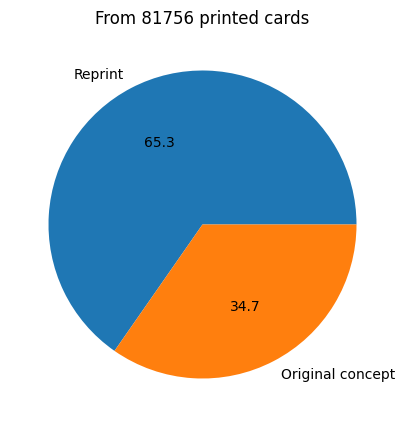

In [9]:
df = pd.read_csv("./cards.csv", usecols=["name", "isReprint"])


df = df.drop_duplicates().dropna()
total_cards = df.size
df = df.value_counts("isReprint").rename({0: "Reprint", 1: "Original concept"})


plot = df.plot(kind="pie", autopct="%.1f", title=f"From {total_cards} printed cards")
plot.set_ylabel("")

plt.rcParams['figure.figsize'] = [15, 5]
plt.show()